In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#读取数据
train_set = pd.read_csv("employee-attrition.csv",encoding='utf-8')
predict_set = pd.read_csv("score.csv")
#pd.read_fwf() #读取二进制文件
#pd.read_excel("filename.xlsx") #读取Excel
#xlrd #读取excel的第三方模块

In [63]:
#数据描述
train_set.info()
train_set.describe()
train_set.values[1]
train_set.values[:,1]
train_set.index
#索引的常见形式（时间序列，数字，字符）
train_set.to_numpy().reshape(-1,1) #?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
EmployeeNumber              1000 non-null int64
Gender                      1000 non-null object
Age                         1000 non-null int64
Department                  1000 non-null object
DistanceFromHome            1000 non-null int64
Education                   1000 non-null int64
EducationField              1000 non-null object
MonthlyIncome               1000 non-null int64
MonthlyRate                 1000 non-null int64
NumCompaniesWorked          1000 non-null int64
RelationshipSatisfaction    1000 non-null int64
TotalWorkingYears           1000 non-null int64
Attrition                   1000 non-null object
dtypes: int64(9), object(4)
memory usage: 101.7+ KB


array([[1],
       ['Female'],
       [41],
       ...,
       [3],
       [21],
       ['No']], dtype=object)

In [71]:
import numpy as np
dates=pd.date_range('2019-08-01',periods=6)
num = np.random.randint(6)
column = ['a','b','c','d']
df = pd.DataFrame(data=num,index=dates,columns=column)
df

,a,b,c,d
2019-08-01,4,4,4,4
2019-08-02,4,4,4,4
2019-08-03,4,4,4,4
2019-08-04,4,4,4,4
2019-08-05,4,4,4,4
2019-08-06,4,4,4,4


In [72]:
df.T
df.loc['2019-08-02']
df.iloc[0]
df.ix[[2,5],['b','c']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,b,c
2019-08-03,4,4
2019-08-06,4,4


In [86]:
col = ['b','c','a','d'] #固定列名
df.ix[:,col]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,b,c,a,d
2019-08-01,4,4,4,4
2019-08-02,4,4,4,4
2019-08-03,4,4,4,4
2019-08-04,4,4,4,4
2019-08-05,4,4,4,4
2019-08-06,4,4,4,4


In [84]:
#常用的统计函数
train_set.var() #方差，表示离散度
train_set.corr() #相关系数
train_set.cov() #协方差，表示相关度
train_set.median() #中位数
train_set.sum() #汇总和
train_set.cumsum() #累计和
train_set.Age.cumprod() #累计积
train_set.Age.argmin #返回最小值的下标
train_set.MonthlyIncome.argmax #返回最大值的下标
train_set.MonthlyIncome.ptp #极差
print(train_set.Age.mode()) #众数
train_set #4分位差 75%-25%的差
train_set['Age'].sem() #标准误差

0    35
dtype: int64


0.29781643781133144

In [97]:
#数据探索
##词频统计
train_set.Gender.value_counts()
print(train_set.Gender.value_counts(ascending=True))
print(train_set.Gender.value_counts(normalize=True))
#分组统计信息
train_set.groupby(train_set.Department).count()
train_set.groupby(train_set.RelationshipSatisfaction).sum()
train_set.MonthlyIncome.groupby(by = train_set.Department).mean()

Female    416
Male      584
Name: Gender, dtype: int64
Male      0.584
Female    0.416
Name: Gender, dtype: float64


Department
Human Resources           7645.828571
Research & Development    6363.853695
Sales                     7086.910596
Name: MonthlyIncome, dtype: float64

In [105]:
#列操作
train_set.columns
train_set.columns.tolist()
train_set.index
train_set.columns[[1,2,3]]
train_set.Age.dtype
train_set.Age > 30 #数值判断
train_set[train_set.Age > 30] #筛选判断后的值

,EmployeeNumber,Gender,Age,Department,DistanceFromHome,Education,EducationField,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,Attrition
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#查看是否有缺失值
## 离散值填众数，数值型填（均值、中位数、众数）
print(train_set.isnull().any())
train_set.shape
train_set.isnull()
train_set.Gender.isin(['Male'])
#填充缺失值
train_set.fillna(0.1234) #固定值填充
train_set.fillna(method='ffill') #前一个值填充
train_set.fillna(method='bfill') #前一个值填充
#删除缺失值
train_set.dropna(how='all') #all:全部是缺失值，any：只要有一个就删除
train_set.dropna(thresh = 2) #有两个缺失值
#插值法
##线性插值


EmployeeNumber              False
Gender                      False
Age                         False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
RelationshipSatisfaction    False
TotalWorkingYears           False
Attrition                   False
dtype: bool


TypeError: Index(...) must be called with a collection of some kind, 'Age' was passed

In [106]:
#重复值的清洗
##数值重复
train_set.drop_duplicates() #keep='first'保留第一个
##特征重复
train_set.corr(method='pearson') # 相关系数：'pearson'结果是1时，是重复特征；>0.5显著相关；>0.3相关
train_set.drop()

,EmployeeNumber,Gender,Age,Department,DistanceFromHome,Education,EducationField,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,Attrition
0,1,Female,41,Sales,1,2,Life Sciences,5993,19479,8,1,8,Yes
1,2,Male,49,Research & Development,8,1,Life Sciences,5130,24907,1,4,10,No
2,4,Male,37,Research & Development,2,2,Other,2090,2396,6,2,7,Yes
3,5,Female,33,Research & Development,3,4,Life Sciences,2909,23159,1,3,8,No
4,7,Male,27,Research & Development,2,1,Medical,3468,16632,9,4,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1402,Female,43,Research & Development,6,3,Medical,4081,20003,1,1,20,No
996,1403,Female,27,Sales,10,3,Marketing,5769,7100,1,4,6,No
997,1405,Female,27,Research & Development,17,4,Life Sciences,2394,25681,1,4,8,Yes
998,1407,Male,26,Research & Development,2,1,Medical,3904,4050,0,4,5,No


In [ ]:
#异常值清洗
# 3\sigma原则：拉伊达法则。适用于正态分布。\mu均值；\sigma标准差。3\sigma占比达到0.9973。
#箱线图分析：QL(下四分位),QU(上四分位),IQR(QU-QL,包含全部观察值的一半)

In [ ]:
#字符串的清洗

In [39]:
#查看不同的值
train_set.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
#数据清洗
##缺失值清洗
##重复值清洗
##异常值清洗

In [ ]:
##数据的归一化
##正则化
##标准化

In [ ]:
#数据的格式变换
##行列变换


In [ ]:
#数据的评估和优化
准确率
精度
召回率
F1综合评分矩阵
ROC曲线
混淆矩阵
#K-means 
#SVM 核函数

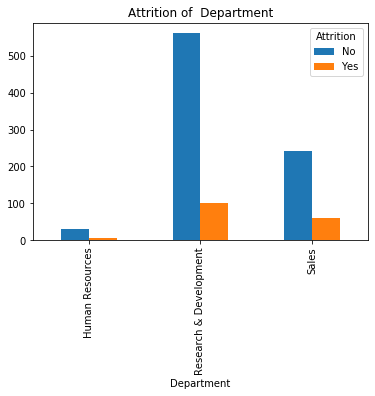

In [42]:
#制作直方图
pd.crosstab(train_set.Department, train_set.Attrition).plot(kind = 'bar')
plt.title('Attrition of  Department')
plt.xlabel = 'Department'
plt.ylabel = 'Attrition'
plt.savefig('AttritionofDepartment')

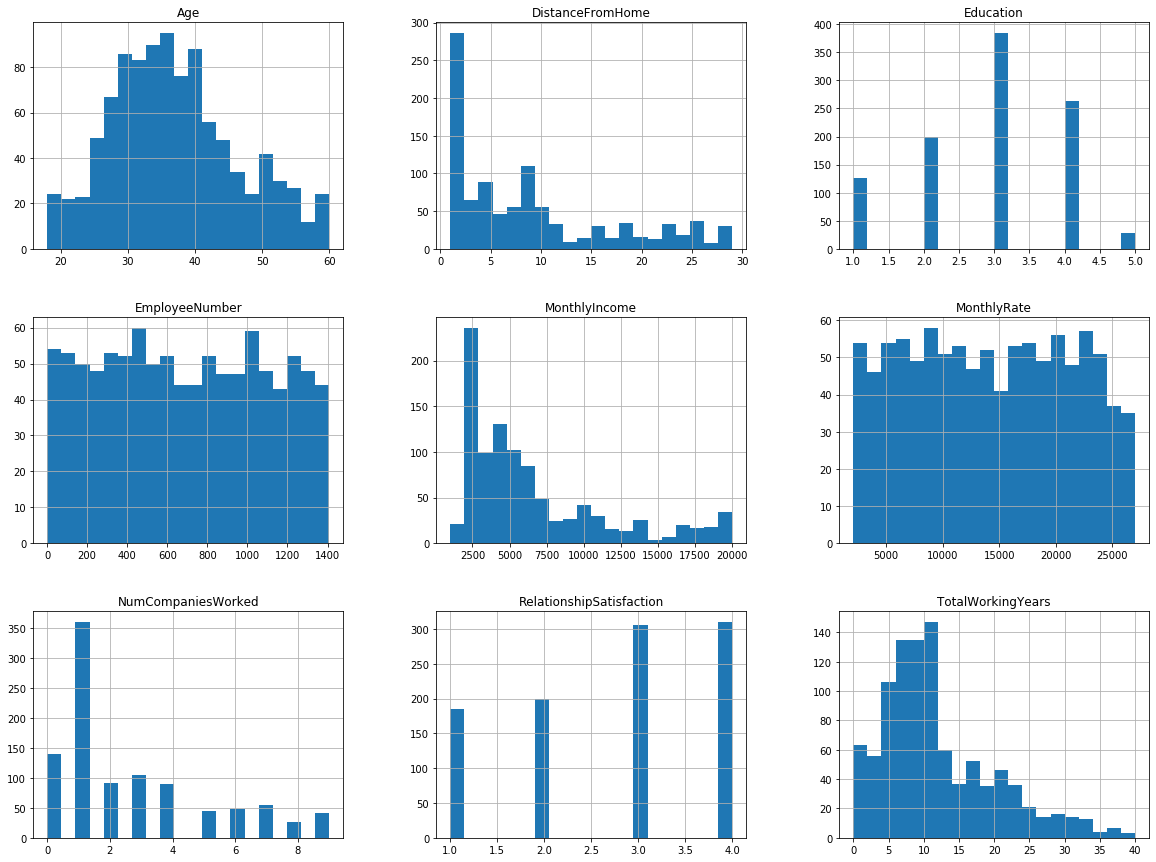

In [51]:
num_bins = 20 #分箱大小
train_set.hist(bins = num_bins, figsize = (20,15))
plt.show()

In [2]:
#最重要的预处理!
cat_vars=['Gender','Department','EducationField']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var],prefix = var)
    df_with_dummy = df.join(cat_list)
    df = df_with_dummy

In [3]:
df.drop(df.columns[[1,3,6]], axis = 1, inplace=True) #inplace=True 修改原表数据， False删除内存数据

In [4]:
#df.to_csv('employee_pre.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
EmployeeNumber                       1000 non-null int64
Age                                  1000 non-null int64
DistanceFromHome                     1000 non-null int64
Education                            1000 non-null int64
MonthlyIncome                        1000 non-null int64
MonthlyRate                          1000 non-null int64
NumCompaniesWorked                   1000 non-null int64
RelationshipSatisfaction             1000 non-null int64
TotalWorkingYears                    1000 non-null int64
Attrition                            1000 non-null object
Gender_Female                        1000 non-null uint8
Gender_Male                          1000 non-null uint8
Department_Human Resources           1000 non-null uint8
Department_Research & Development    1000 non-null uint8
Department_Sales                     1000 non-null uint8
EducationField_Human Resources       1

In [5]:
df_var = df.columns.values.tolist()
Y=['Attrition']
X=[i for i in df_var if i not in Y]

In [6]:
X, Y

(['EmployeeNumber',
  'Age',
  'DistanceFromHome',
  'Education',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'RelationshipSatisfaction',
  'TotalWorkingYears',
  'Gender_Female',
  'Gender_Male',
  'Department_Human Resources',
  'Department_Research & Development',
  'Department_Sales',
  'EducationField_Human Resources',
  'EducationField_Life Sciences',
  'EducationField_Marketing',
  'EducationField_Medical',
  'EducationField_Other',
  'EducationField_Technical Degree'],
 ['Attrition'])

In [7]:
#特征选择
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,12)
rfe = rfe.fit(df[X],df[Y])
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True  True  True False  True
  True False  True  True  True  True  True  True]
[7 4 5 6 8 9 1 1 1 1 2 1 1 3 1 1 1 1 1 1]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence

In [8]:
select_colomns = [  'RelationshipSatisfaction',
'Gender_Female',
'Department_Human Resources',
'Department_Research & Development',
'EducationField_Human Resources',
'EducationField_Life Sciences',
'EducationField_Marketing',
'EducationField_Medical',
'EducationField_Other',
'EducationField_Technical Degree']
x=df[select_colomns]
y=df.Attrition

In [9]:
#切割样本
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [10]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)
accuracy_score(Y_test,rf.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8333333333333334

In [11]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
accuracy_score(Y_test,svc.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8366666666666667

In [12]:
#线性回归
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
accuracy_score(Y_test,logreg.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8366666666666667

In [13]:
#预测集处理
##预处理
df_predict = pd.read_csv('./My Project/AI/20191115/score.csv')
cat_vars=['Gender','Department','EducationField']
for var in cat_vars:
    cat_list = pd.get_dummies(df_predict[var],prefix = var)
    df_predict_with_dummy = df_predict.join(cat_list)
    df_predict = df_predict_with_dummy

In [15]:
df_predict.drop(df_predict.columns[[1,3,6]], axis = 1, inplace=True)

In [19]:
x_predict = df_predict[select_colomns]

In [27]:
df1 = pd.get_dummies(df['Attrition'],prefix='Attrition')

In [38]:
df1.corr(df1.Attrition_No)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
df1 = df1.drop(df1.columns[9],axis = 1)

In [7]:
df.corrwith(df.Age)

EmployeeNumber              0.002102
Age                         1.000000
DistanceFromHome           -0.018776
Education                   0.182582
MonthlyIncome               0.505284
MonthlyRate                 0.016005
NumCompaniesWorked          0.312032
RelationshipSatisfaction    0.053249
TotalWorkingYears           0.690203
dtype: float64